In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Underfitting and Overfitting : KNN

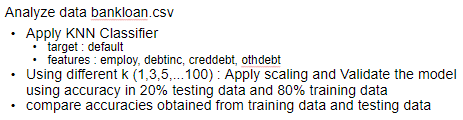

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

In [4]:
X = bankloan[fitur]
y = bankloan[target]

>## Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2021)

> ## Standardization Process

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

> ## Selection Process of K Factor

In [7]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train_scaled, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i


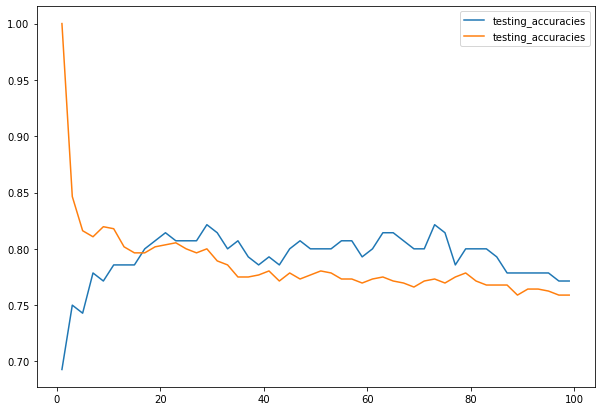

In [8]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','testing_accuracies'])
plt.show()

In [9]:
print('best k :',best_k)
print('accuracy :',score)

best k : 29
accuracy : 0.8214285714285714


## Underfitting and Overfitting : Decision Tree

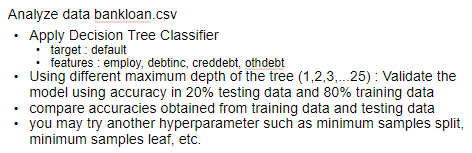

> ### Selection Process of Maximum Depth

In [10]:
depths = range(1,26)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    dtc_ = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=2021)
    dtc_.fit(X_train, y_train)
    
    y_predict_train = dtc_.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_depth = i

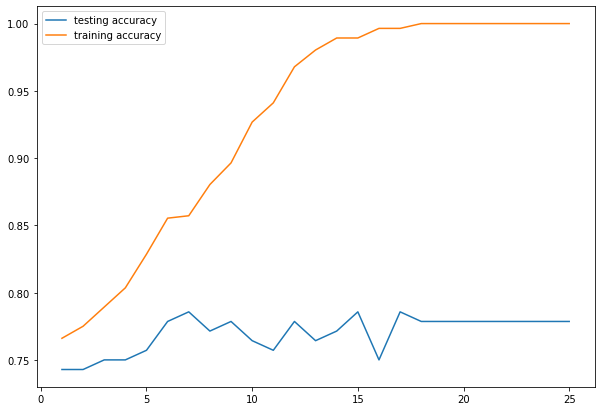

In [11]:
plt.figure(figsize=(10,7))
sns.lineplot(depths,testing_accuracies)
sns.lineplot(depths,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.show()

In [12]:
print('best depths :',best_depth)
print('accuracy :',score)

best depths : 7
accuracy : 0.7857142857142857


In [13]:
len(bankloan)

700

In [14]:
np.sqrt(700)

26.457513110645905

In [15]:
dict(zip(list(range(1,26)),list(zip(training_accuracies, testing_accuracies))))


{1: (0.7660714285714286, 0.7428571428571429),
 2: (0.775, 0.7428571428571429),
 3: (0.7892857142857143, 0.75),
 4: (0.8035714285714286, 0.75),
 5: (0.8285714285714286, 0.7571428571428571),
 6: (0.8553571428571428, 0.7785714285714286),
 7: (0.8571428571428571, 0.7857142857142857),
 8: (0.8803571428571428, 0.7714285714285715),
 9: (0.8964285714285715, 0.7785714285714286),
 10: (0.9267857142857143, 0.7642857142857142),
 11: (0.9410714285714286, 0.7571428571428571),
 12: (0.9678571428571429, 0.7785714285714286),
 13: (0.9803571428571428, 0.7642857142857142),
 14: (0.9892857142857143, 0.7714285714285715),
 15: (0.9892857142857143, 0.7857142857142857),
 16: (0.9964285714285714, 0.75),
 17: (0.9964285714285714, 0.7857142857142857),
 18: (1.0, 0.7785714285714286),
 19: (1.0, 0.7785714285714286),
 20: (1.0, 0.7785714285714286),
 21: (1.0, 0.7785714285714286),
 22: (1.0, 0.7785714285714286),
 23: (1.0, 0.7785714285714286),
 24: (1.0, 0.7785714285714286),
 25: (1.0, 0.7785714285714286)}

# Exercise : Try different value of minimum samples split of minimum sample leaf. 
## boleh cobain pake gridsearch

## Underfitting and Overfitting : Linear Model Regression

> ## Data

In [16]:
boston = load_boston()

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
x = pd.DataFrame(data=boston['data'],columns = boston['feature_names'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
y=pd.Series(boston['target'])
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

> ## Data Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1899)

> ## Ridge Regression

In [22]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [38]:
alphas = [100000,10000,1000,100,10,1,0.1,0.01,0.001]
testing_mse = []
training_mse = []
score = 0

for i in alphas:
    ridge_ = Ridge(alpha=i)
    ridge_.fit(X_train,y_train)
    
    y_predict_train=ridge_.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))
    
    y_predict_test=ridge_.predict(X_test)
    testing_mse.append(mean_squared_error(y_test,y_predict_test))
    
    mse_score=mean_squared_error(y_test,y_predict_test)
    
    if score > -mse_score:
        score = mse_score
        best_c = i

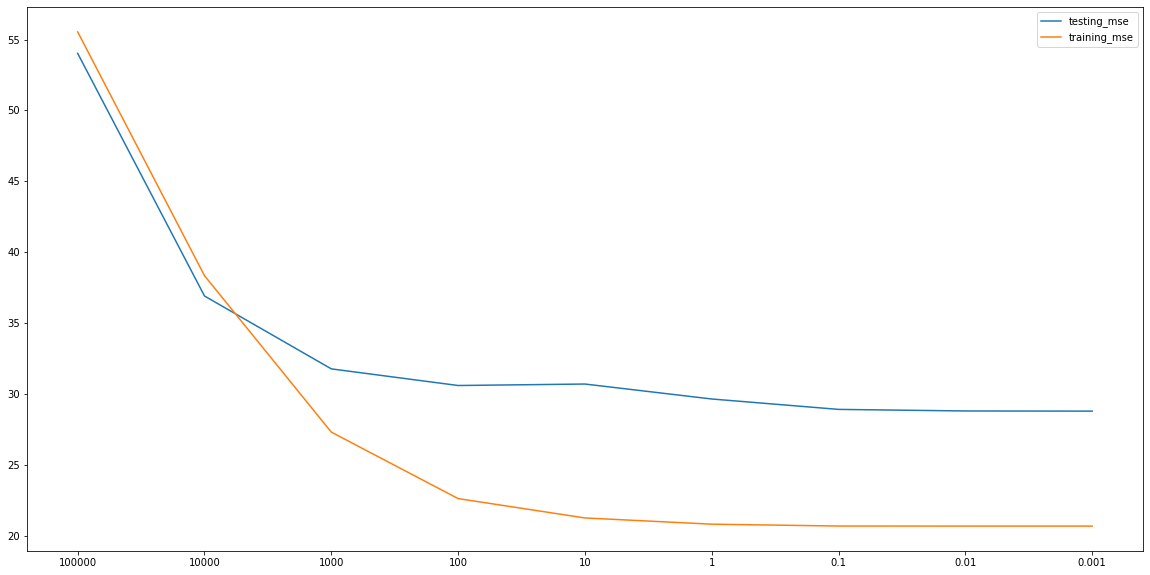

In [39]:
length = range(len(alphas))

plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing_mse','training_mse'])
plt.xticks(length,alphas)
plt.show()

In [40]:
print('best alpha :',best_c)
print('inget. MSE tuh error. cari yang paling kecil')
print('mse :',score)

best alpha : 0.001
inget. MSE tuh error. cari yang paling kecil
mse : 28.778402778052975


## How it works ?

In [26]:
np.random.seed(2020)
data = {
    'x': np.arange(10),
    'y': np.arange(10)+np.random.randn(10)
}

df = pd.DataFrame(data)
df

,x,y
0,0,-1.768846
1,1,1.075552
2,2,0.869370
3,3,2.348570
4,4,3.106884
5,5,3.725899
6,6,5.938846
7,7,7.064514
8,8,8.410113
9,9,8.427118


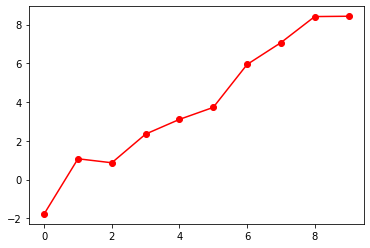

In [27]:
plt.plot(df['x'],df['y'],'ro-')

> ## 80:20 Data

In [28]:
Xtr, Xts, ytr, yts = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=1)
lr8020 = LinearRegression()
lr8020.fit(Xtr, ytr)
df['pred_8020'] = lr8020.predict(df[['x']])
df

,x,y,pred_8020
0,0,-1.768846,-1.198615
1,1,1.075552,-0.037131
2,2,0.869370,1.124353
3,3,2.348570,2.285837
4,4,3.106884,3.447321
5,5,3.725899,4.608804
6,6,5.938846,5.770288
7,7,7.064514,6.931772
8,8,8.410113,8.093256
9,9,8.427118,9.254740


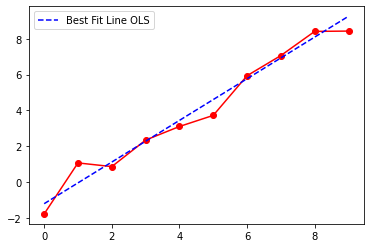

In [29]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['pred_8020'],'b--',label='Best Fit Line OLS')
plt.legend()
plt.show()

> ## 2 Data

In [30]:
lr2=LinearRegression()
lr2.fit(df[['x']].iloc[:2],df['y'][:2])
df['pred_2']=lr2.predict(df[['x']])
df

,x,y,pred_8020,pred_2
0,0,-1.768846,-1.198615,-1.768846
1,1,1.075552,-0.037131,1.075552
2,2,0.869370,1.124353,3.919950
3,3,2.348570,2.285837,6.764348
4,4,3.106884,3.447321,9.608746
5,5,3.725899,4.608804,12.453144
6,6,5.938846,5.770288,15.297542
7,7,7.064514,6.931772,18.141940
8,8,8.410113,8.093256,20.986338
9,9,8.427118,9.254740,23.830736


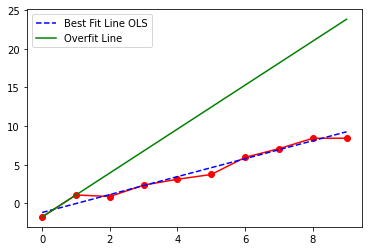

In [31]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['pred_8020'],'b--',label='Best Fit Line OLS')
plt.plot(df['x'],df['pred_2'],'g-',label='Overfit Line')
plt.legend()
plt.show()

> ## Ridge 2 Data

ridge coef [1.09399922]


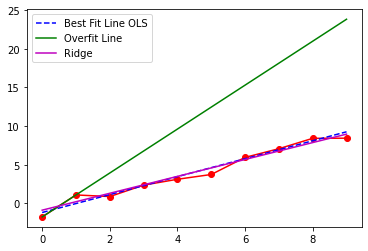

In [32]:
ridge = Ridge(alpha=0.8)
ridge.fit(df[['x']].iloc[:2], df['y'][:2])
df['pred_ridge'] = ridge.predict(df[['x']])
print('ridge coef',ridge.coef_)

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best Fit Line OLS')
plt.plot(df['x'], df['pred_2'], 'g-', label='Overfit Line')
plt.plot(df['x'], df['pred_ridge'], 'm-', label='Ridge')
plt.legend()
plt.show()

In [33]:
lr8020.coef_

array([1.1614839])

In [34]:
mse_train_2_ols = mean_squared_error(df['y'][:2], df['pred_2'][:2])
mse_train_2_ridge = mean_squared_error(df['y'][:2], df['pred_ridge'][:2])

print(mse_train_2_ols)
print(mse_train_2_ridge)

1.232595164407831e-31
0.7659739503274089


In [35]:
mse_test_2_ols = mean_squared_error(df['y'][2:], df['pred_2'][2:])
mse_test_2_ridge = mean_squared_error(df['y'][2:], df['pred_ridge'][2:])

print(mse_test_2_ols)
print(mse_test_2_ridge)

94.12145393833816
0.22361676326876134
